In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data understanding

In [2]:
# Read data
gender = pd.read_csv('gender_classification_v7.csv')

In [3]:
# First 5 rows
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
gender.shape

(5001, 8)

## Data Preprocessing

In [6]:
#check if got any duplicated
gender.loc[gender.duplicated(),:]

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
59,1,14.1,5.9,0,0,0,0,Female
66,1,14.2,6.2,0,0,0,0,Female
175,1,12.7,5.7,1,1,1,1,Male
230,1,12.9,5.1,0,0,0,0,Female
261,1,13.0,6.2,1,1,1,1,Male
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [7]:
gender.drop_duplicates(inplace=True)
gender

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1,Male
4990,1,12.6,5.7,0,0,1,0,Female
4992,1,14.1,7.0,1,1,1,1,Male
4993,1,11.6,5.9,0,0,0,1,Female


In [8]:
# Check if any missing values
gender.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [9]:
# Show data with null values 
gender_null = pd.DataFrame(gender.isnull().sum(),columns=['Number of null'])
gender_null['percentage'] = (gender.isnull().sum())/len(gender)*100
gender_null

,Number of null,percentage
long_hair,0,0.0
forehead_width_cm,0,0.0
forehead_height_cm,0,0.0
nose_wide,0,0.0
nose_long,0,0.0
lips_thin,0,0.0
distance_nose_to_lip_long,0,0.0
gender,0,0.0


In [10]:
gender.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.013151,-0.005145,0.024123,0.042556,0.037514,-0.011362
forehead_width_cm,-0.013151,1.000000,0.079665,0.212223,0.212032,0.220566,0.206636
forehead_height_cm,-0.005145,0.079665,1.000000,0.180526,0.153438,0.170018,0.183036
nose_wide,0.024123,0.212223,0.180526,1.000000,0.394605,0.379767,0.395401
nose_long,0.042556,0.212032,0.153438,0.394605,1.000000,0.384860,0.377462
lips_thin,0.037514,0.220566,0.170018,0.379767,0.384860,1.000000,0.380805
distance_nose_to_lip_long,-0.011362,0.206636,0.183036,0.395401,0.377462,0.380805,1.000000


<AxesSubplot:>

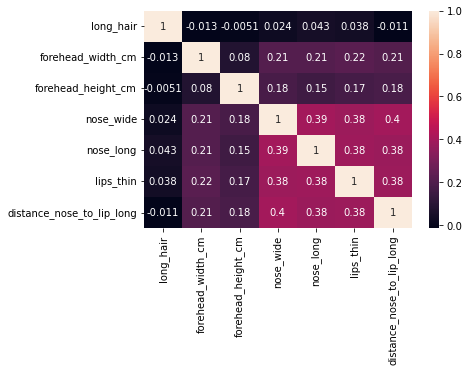

In [11]:
import seaborn as sns
sns.heatmap(gender.corr(),annot=True)

##  Logistic Regression

In [12]:
X = gender.iloc[:,:-1] # All except last column(Gender)
y = gender.iloc[:,-1] # Gender only

In [13]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1
4990,1,12.6,5.7,0,0,1,0
4992,1,14.1,7.0,1,1,1,1
4993,1,11.6,5.9,0,0,0,1


In [14]:
y 

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4986      Male
4990    Female
4992      Male
4993    Female
4995      Male
Name: gender, Length: 3233, dtype: object

In [15]:
# trasnform gender columns values to 0 or 1 only
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
le_g = pd.DataFrame(y)

In [16]:
le_g 

,0
0,1
1,0
2,1
3,1
4,0
...,...
3228,1
3229,0
3230,1
3231,0


In [17]:
import time
start_time = time.time()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (2263, 7)
X_test shape is  (970, 7)
y_train shape is  (2263,)
y_test shape is  (970,)


In [18]:
# transform all columns values except gender column to 0 to 1 range only
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Predict Values
y_pred = log_reg.predict(X_test)

end_time = time.time()

print('LogisticRegressionModel Train Score is : ' , log_reg.score(X_train, y_train)*100)
print('LogisticRegressionModel Test Score is : ' , log_reg.score(X_test, y_test)*100)
print('LogisticRegressionModel Classes are : ' , log_reg.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , log_reg.n_iter_)

LogisticRegressionModel Train Score is :  94.91825011047283
LogisticRegressionModel Test Score is :  95.56701030927836
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [18]


In [20]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [21]:
 # 0 for probability of Female in Gender (target) column
log_reg.predict_proba(X_test)[:,0]

array([8.86778107e-01, 1.95387310e-03, 9.48108323e-03, 4.00375507e-03,
       9.32485879e-01, 6.19945233e-01, 8.86059664e-04, 3.14516353e-02,
       9.89724684e-01, 7.86101372e-03, 4.36967194e-04, 9.60952341e-01,
       3.72920976e-01, 8.95050222e-04, 9.99381031e-01, 1.87486737e-02,
       5.06015397e-04, 9.98975125e-01, 1.61826241e-02, 9.63336386e-01,
       1.36852913e-02, 2.33737165e-02, 9.90040166e-01, 2.12482459e-02,
       6.96863180e-03, 9.97616436e-01, 2.19707897e-02, 9.99240723e-01,
       9.99537936e-01, 9.76073117e-01, 9.35419793e-01, 9.99067462e-01,
       9.75765370e-03, 1.32216896e-02, 1.72997203e-04, 2.75370356e-02,
       9.98843092e-01, 9.77996024e-01, 2.28616613e-04, 9.99226103e-01,
       6.41803522e-04, 8.71949134e-04, 1.03416565e-02, 1.05702473e-03,
       7.08804283e-03, 1.39627812e-02, 9.99369908e-01, 3.77726669e-01,
       5.54489442e-02, 6.13467408e-04, 9.98680092e-01, 9.84482129e-01,
       7.15885677e-04, 5.80123353e-04, 9.98659588e-01, 1.24670037e-03,
      

In [22]:
 # 1 is for probability of Male in Gender (target) column
log_reg.predict_proba(X_test)[:,1]

array([1.13221893e-01, 9.98046127e-01, 9.90518917e-01, 9.95996245e-01,
       6.75141209e-02, 3.80054767e-01, 9.99113940e-01, 9.68548365e-01,
       1.02753162e-02, 9.92138986e-01, 9.99563033e-01, 3.90476592e-02,
       6.27079024e-01, 9.99104950e-01, 6.18968652e-04, 9.81251326e-01,
       9.99493985e-01, 1.02487522e-03, 9.83817376e-01, 3.66636137e-02,
       9.86314709e-01, 9.76626284e-01, 9.95983363e-03, 9.78751754e-01,
       9.93031368e-01, 2.38356381e-03, 9.78029210e-01, 7.59277269e-04,
       4.62064473e-04, 2.39268829e-02, 6.45802072e-02, 9.32538045e-04,
       9.90242346e-01, 9.86778310e-01, 9.99827003e-01, 9.72462964e-01,
       1.15690802e-03, 2.20039762e-02, 9.99771383e-01, 7.73896580e-04,
       9.99358196e-01, 9.99128051e-01, 9.89658343e-01, 9.98942975e-01,
       9.92911957e-01, 9.86037219e-01, 6.30091983e-04, 6.22273331e-01,
       9.44551056e-01, 9.99386533e-01, 1.31990798e-03, 1.55178710e-02,
       9.99284114e-01, 9.99419877e-01, 1.34041202e-03, 9.98753300e-01,
      

In [23]:
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred)
cm_lr

array([[401,  24],
       [ 19, 526]], dtype=int64)

<AxesSubplot:>

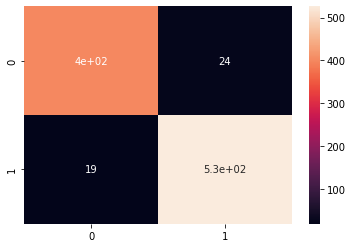

In [24]:
sns.heatmap(cm_lr, annot = True)

In [25]:
#Print accuarcy score
AccScore_lr = accuracy_score(y_test, y_pred)
AccScore_lr = round(AccScore_lr * 100,2)
print("Accuarcy Score is:", AccScore_lr)
PrecisionScore_lr = precision_score(y_test, y_pred)
PrecisionScore_lr = PrecisionScore_lr*100
print('Precision Score is : ', PrecisionScore_lr)

Accuarcy Score is: 95.57
Precision Score is :  95.63636363636364


## Random Forest Classifier

In [26]:
X_rf = gender.iloc[:,:-1] # All except last column(Gender)
y_rf= gender.iloc[:,-1] # Gender only

In [27]:
# trasnform gender columns values to 0 or 1 only
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_rf = le.fit_transform(y_rf)
pd.DataFrame(y_rf)

,0
0,1
1,0
2,1
3,1
4,0
...,...
3228,1
3229,0
3230,1
3231,0


In [28]:
rf_start_time = time.time()
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=33, shuffle =True)
print('X_train shape is ' , X_train_rf.shape)
print('X_test shape is ' , X_test_rf.shape)
print('y_train shape is ' , y_train_rf.shape)
print('y_test shape is ' , y_test_rf.shape)

X_train shape is  (2263, 7)
X_test shape is  (970, 7)
y_train shape is  (2263,)
y_test shape is  (970,)


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_rf = sc.fit_transform(X_train_rf)
X_test_rf = sc.transform(X_test_rf)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=20,random_state=33)
rf.fit(X_train_rf, y_train_rf)
# Predict Values
y_pred_rf = rf.predict(X_test_rf)
rf_end_time = time.time()

In [31]:
print('RandomForestClassifierModel Train Score is : ' , rf.score(X_train_rf, y_train_rf)*100)
print('RandomForestClassifierModel Test Score is : ' , rf.score(X_test_rf, y_test_rf)*100)
print('RandomForestClassifierModel features importances are : ' , rf.feature_importances_)
print('RandomForestClassifierModel Classes are : ' , rf.classes_)

RandomForestClassifierModel Train Score is :  99.9116217410517
RandomForestClassifierModel Test Score is :  94.84536082474226
RandomForestClassifierModel features importances are :  [0.00379362 0.12248296 0.08468397 0.24464497 0.1502159  0.18566263
 0.20851595]
RandomForestClassifierModel Classes are :  [0 1]


In [32]:
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
cm_rf

array([[431,  26],
       [ 24, 489]], dtype=int64)

<AxesSubplot:>

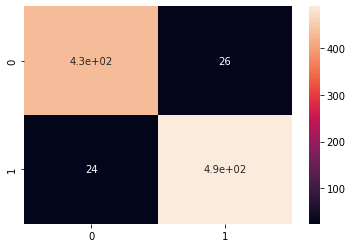

In [33]:
sns.heatmap(cm_rf, annot = True)

In [34]:
#Print accuarcy score
AccScore_rf = accuracy_score(y_test_rf, y_pred_rf)
AccScore_rf = round(AccScore_rf * 100,2)
print("Accuarcy Score is:", AccScore_rf)
PrecisionScore_rf = precision_score(y_test_rf, y_pred_rf)
PrecisionScore_rf = PrecisionScore_rf*100
print('Precision Score is : ', PrecisionScore_rf)

Accuarcy Score is: 94.85
Precision Score is :  94.95145631067962


## Decision Tree Classifier

In [35]:
X_dt = gender.iloc[:,:-1] # All except last column(Gender)
y_dt= gender.iloc[:,-1] # Gender only

In [36]:
# trasnform gender columns values to 0 or 1 only
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_dt = le.fit_transform(y_dt)
le_g = pd.DataFrame(y_dt)

In [37]:
dt_start_time = time.time()
from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=33, shuffle =True)
print('X_train shape is ' , X_train_dt.shape)
print('X_test shape is ' , X_test_dt.shape)
print('y_train shape is ' , y_train_dt.shape)
print('y_test shape is ' , y_test_dt.shape)

X_train shape is  (2263, 7)
X_test shape is  (970, 7)
y_train shape is  (2263,)
y_test shape is  (970,)


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_dt = sc.fit_transform(X_train_dt)
X_test_dt = sc.transform(X_test_dt)

In [39]:
# import the Decision tree classifier from scikit learn
from sklearn.tree import DecisionTreeClassifier
#initialize the Decision tree model using Entropy (Information Gain)
DT=DecisionTreeClassifier(criterion ='entropy', max_depth=6,random_state= 33)
#fit the DT Model
DT.fit(X_train_dt,y_train_dt)
# Predicted the result
y_pred_dt=DT.predict(X_test_dt)
y_pred_dt
dt_end_time = time.time()

In [40]:
print('Decision Tree Classifier Model Train Score is : ' , DT.score(X_train_dt, y_train_dt)*100)
print('Decision Tree Classifier Model Test Score is : ' , DT.score(X_test_dt, y_test_dt)*100)

Decision Tree Classifier Model Train Score is :  96.90676093680955
Decision Tree Classifier Model Test Score is :  95.15463917525773


In [41]:
# Making  a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test_dt, y_pred_dt)
cm_dt


array([[439,  18],
       [ 29, 484]], dtype=int64)

In [42]:
#Print accuarcy score
AccScore_dt = accuracy_score(y_test_dt, y_pred_dt)
AccScore_dt = round(AccScore_dt * 100,2)
print("Accuarcy Score is:", AccScore_rf)

#Print Precision  Score
PrecisionScore_dt = precision_score(y_test_dt, y_pred_dt)
PrecisionScore_dt = PrecisionScore_dt*100
print('Precision Score is : ', PrecisionScore_dt)

# Recall Score
from sklearn.metrics import recall_score
recall_dt = recall_score(y_test_dt,y_pred_dt) #Average ='micro' used only for multi class only
recall_dt = recall_dt*100
print('Recall_Score is:',recall_dt)

Accuarcy Score is: 94.85
Precision Score is :  96.41434262948208
Recall_Score is: 94.34697855750487


## SVC- Linear

In [43]:
X_svc = gender.iloc[:,:-1] # All except last column(Gender)
y_svc= gender.iloc[:,-1] # Gender only

In [44]:
svc_start_time = time.time()
from sklearn.model_selection import train_test_split
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_svc, y_svc, test_size=0.3, random_state=33, shuffle =True)
print('X_train shape is ' , X_train_svc.shape)
print('X_test shape is ' , X_test_svc.shape)
print('y_train shape is ' , y_train_svc.shape)
print('y_test shape is ' , y_test_svc.shape)

X_train shape is  (2263, 7)
X_test shape is  (970, 7)
y_train shape is  (2263,)
y_test shape is  (970,)


In [45]:
# transform all columns values except gender column to 0 to 1 range only
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_svc = sc.fit_transform(X_train_svc)
X_test_svc = sc.transform(X_test_svc)

In [46]:
# import support vector machine from scikit learn
from sklearn.svm import SVC
svc_linear = SVC(kernel = 'linear')
# Fitting the dataset
svc_linear.fit(X_train_svc, y_train_svc)
# Prediction - always use X_test
y_pred_svc = svc_linear.predict(X_test_svc)
y_pred_svc
svc_end_time = time.time()

In [47]:
print('Support Vector Machine Linear Model Train Score is : ' , svc_linear.score(X_train_svc, y_train_svc)*100)
print('Support Vector Machine Linear Model Test Score is : ' , svc_linear.score(X_test_svc, y_test_svc)*100)

Support Vector Machine Linear Model Train Score is :  95.44851966416262
Support Vector Machine Linear Model Test Score is :  94.3298969072165


In [48]:
# Making  a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svc=confusion_matrix(y_test_svc, y_pred_svc)
cm_svc

array([[425,  32],
       [ 23, 490]], dtype=int64)

In [49]:
#Print accuarcy score
AccScore_svc = accuracy_score(y_test_svc, y_pred_svc)
AccScore_svc = round(AccScore_svc * 100,2)
print("Accuarcy Score is:", AccScore_svc)


Accuarcy Score is: 94.33


##  Summary Metrics for the 4 classifications

In [50]:
# To read accuracy score of different models in dataframe
df_modelAcc = pd.DataFrame({'Logistic Regression': [AccScore_lr],
                   'Random Forest': [AccScore_rf],
                   'Decision Tree': [AccScore_dt],
                   'SVC Linear': [AccScore_svc]})
df_modelAcc

,Logistic Regression,Random Forest,Decision Tree,SVC Linear
0,95.57,94.85,95.15,94.33


In [51]:
lr_time = round(end_time - start_time,3)
rf_time = round(rf_end_time - rf_start_time,3)
dt_time = round(dt_end_time - dt_start_time,3)
svc_time = round(svc_end_time - svc_start_time,3)

# Select the 'Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC Linear' columns
series = df_modelAcc[['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC Linear']]
series = series.squeeze()
df = series.to_frame()
df = df.reset_index()
df.columns = ['Model','Accuracy Score']
df['Accuracy Score'] = df['Accuracy Score'].apply(lambda x: f'{x/100:.2%}')
df.sort_values(by="Accuracy Score", ascending= False)

,Model,Accuracy Score
0,Logistic Regression,95.57%
2,Decision Tree,95.15%
1,Random Forest,94.85%
3,SVC Linear,94.33%


In [52]:
# To read time score of different models in dataframe
df_modelTime = pd.DataFrame({'Logistic Regression': [lr_time],
                   'Random Forest': [rf_time],
                   'Decision Tree': [dt_time],
                   'SVC Linear': [svc_time]})
df_modelTime

,Logistic Regression,Random Forest,Decision Tree,SVC Linear
0,0.141,0.281,0.031,0.125


In [53]:
 #Select the 'Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC Linear' columns
series2 = df_modelTime[['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC Linear']]
series2 = series2.squeeze()
df2 = series2.to_frame()
df2 = df2.reset_index()
df2.columns = ['Model','Run Time']
df2['Run Time'] = df2['Run Time'].apply(lambda x: f'{x:.3f}s')
df2.sort_values(by="Run Time")

,Model,Run Time
2,Decision Tree,0.031s
3,SVC Linear,0.125s
0,Logistic Regression,0.141s
1,Random Forest,0.281s


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(classification_report(y_test_rf, y_pred_rf))
print(classification_report(y_test_dt, y_pred_dt))
print(classification_report(y_test_svc, y_pred_svc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       425
           1       0.96      0.97      0.96       545

    accuracy                           0.96       970
   macro avg       0.96      0.95      0.95       970
weighted avg       0.96      0.96      0.96       970

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       457
           1       0.95      0.95      0.95       513

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       457
           1       0.96      0.94      0.95       513

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970

              preci